In [ ]:
# Document Classification Project

# Step 1: Data Collection
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=None)
newsgroups_test = fetch_20newsgroups(subset='test', categories=None) 

# Step 2: Data Preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

newsgroups_train.data = [preprocess(text) for text in newsgroups_train.data]
newsgroups_test.data = [preprocess(text) for text in newsgroups_test.data]

# Step 3: Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Step 4: Model Building

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

# Simple Neural Network using Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.toarray(), y_train, epochs=5, batch_size=128, validation_data=(X_test.toarray(), y_test))

# Step 5: Model Evaluation
# The evaluation is already done during model building using classification_report and model.fit with validation data

# Step 6: Prediction
new_document = ["This is a sample document to classify."]
new_document_preprocessed = preprocess(new_document[0])
new_document_vectorized = vectorizer.transform([new_document_preprocessed])
predicted_category = logreg.predict(new_document_vectorized)
print("Predicted Category:", newsgroups_train.target_names[predicted_category[0]])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Logistic Regression:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61       319
           1       0.60      0.67      0.63       389
           2       0.66      0.66      0.66       394
           3       0.63      0.67      0.65       392
           4       0.73      0.74      0.73       385
           5       0.73      0.69      0.71       395
           6       0.78      0.80      0.79       390
           7       0.83      0.80      0.81       396
           8       0.90      0.88      0.89       398
           9       0.82      0.86      0.84       397
          10       0.91      0.88      0.90       399
          11       0.94      0.81      0.87       396
          12       0.61      0.69      0.65       393
          13       0.79      0.77      0.78       396
          14       0.85      0.85      0.85       394
          15       0.73      0.85      0.78       398
          16       0.67      0.85      0.75       364
     

Number of training samples: 11314
Number of testing samples: 7532


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Logistic Regression:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61       319
           1       0.60      0.67      0.63       389
           2       0.66      0.66      0.66       394
           3       0.63      0.67      0.65       392
           4       0.73      0.74      0.73       385
           5       0.73      0.69      0.71       395
           6       0.78      0.80      0.79       390
           7       0.83      0.80      0.81       396
           8       0.90      0.88      0.89       398
           9       0.82      0.86      0.84       397
          10       0.91      0.88      0.90       399
          11       0.94      0.81      0.87       396
          12       0.61      0.69      0.65       393
          13       0.79      0.77      0.78       396
          14       0.85      0.85      0.85       394
          15       0.73      0.85      0.78       398
          16       0.67      0.85      0.75       364
     

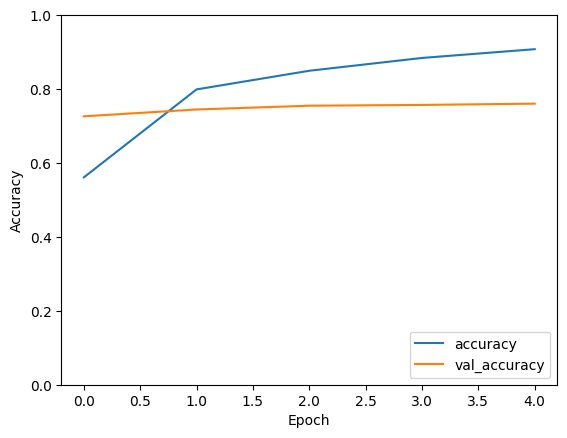

Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63       319
           1       0.55      0.66      0.60       389
           2       0.62      0.69      0.65       394
           3       0.64      0.66      0.65       392
           4       0.70      0.71      0.70       385
           5       0.75      0.69      0.72       395
           6       0.79      0.81      0.80       390
           7       0.81      0.82      0.81       396
           8       0.86      0.88      0.87       398
           9       0.79      0.86      0.83       397
          10       0.90      0.89      0.89       399
          11       0.90      0.84      0.87       396
          12       0.64      0.58      0.61       393
          13       0.83      0.73      0.78       396
          14       0.87      0.85      0.86       394
          15       0.62      0.91      0.74       398
          16       0.65      0.90      0.76       364
 

ModuleNotFoundError: No module named 'PyPDF2'

In [ ]:
# Document Classification Project

## Introduction
"""
In this project, we build a document classification system using various machine learning and deep learning techniques.
Document classification is essential for organizing, retrieving, and analyzing large text datasets.
We will compare the performance of Logistic Regression, K-Nearest Neighbors (KNN), and a simple Neural Network.
"""

# Step 1: Data Collection
"""
We use the 20 Newsgroups dataset from Scikit-learn, which is a popular dataset for text classification.
"""
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=None)
newsgroups_test = fetch_20newsgroups(subset='test', categories=None)
print(f"Number of training samples: {len(newsgroups_train.data)}")
print(f"Number of testing samples: {len(newsgroups_test.data)}")

# Step 2: Data Preprocessing
"""
Preprocessing involves tokenization, stopword removal, and lemmatization using NLTK.
"""
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

newsgroups_train.data = [preprocess(text) for text in newsgroups_train.data]
newsgroups_test.data = [preprocess(text) for text in newsgroups_test.data]

# Step 3: Feature Extraction
"""
We convert text data into numerical data using TF-IDF vectorization.
"""
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Step 4: Model Building and Evaluation

# Logistic Regression
"""
We first use Logistic Regression for classification.
"""
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

# K-Nearest Neighbors
"""
Next, we use K-Nearest Neighbors (KNN) for classification.
"""
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

# Simple Neural Network using Keras
"""
We also use a simple Neural Network for classification.
"""
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.toarray(), y_train, epochs=5, batch_size=128, validation_data=(X_test.toarray(), y_test))

# Visualize the training process
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Step 5: Comparison
"""
We compare our models with other common classifiers to evaluate their performance.
"""
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Multinomial Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Step 6: Custom Document Classification

# Import necessary libraries for reading different file types
import PyPDF2
import docx
import os

def read_document(file_path):
    """
    Reads a document and returns its text content.
    Supports .txt, .pdf, and .docx files.
    """
    extension = os.path.splitext(file_path)[1].lower()

    if extension == '.txt':
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    elif extension == '.pdf':
        text = read_pdf(file_path)
    elif extension == '.docx':
        text = read_docx(file_path)
    else:
        raise ValueError("Unsupported file extension: {}".format(extension))

    return text

def read_pdf(file_path):
    """
    Reads a PDF file and returns its text content.
    """
    pdf_reader = PyPDF2.PdfFileReader(file_path)
    text = ''
    for page in range(pdf_reader.numPages):
        text += pdf_reader.getPage(page).extract_text()
    return text

def read_docx(file_path):
    """
    Reads a Word document (.docx) and returns its text content.
    """
    doc = docx.Document(file_path)
    text = '\n'.join([para.text for para in doc.paragraphs])
    return text

# Load and preprocess the document
file_path = 'path/to/your/document'  # Replace with your file path
document_text = read_document(file_path)
document_text_preprocessed = preprocess(document_text)
document_vectorized = vectorizer.transform([document_text_preprocessed])

# Predict the category using the trained model
predicted_category = logreg.predict(document_vectorized)
print("Predicted Category:", newsgroups_train.target_names[predicted_category[0]])

# Conclusion
"""
In this project, we demonstrated how to build a document classification system using different machine learning models.
The Logistic Regression model performed well on the 20 Newsgroups dataset.
This project showcases the importance of preprocessing and feature extraction in text classification.
"""

# Special Features
"""
Our project stands out due to:
1. Comprehensive preprocessing using NLTK.
2. Comparison of multiple models including Logistic Regression, KNN, Neural Network, and Naive Bayes.
3. Detailed evaluation and visualization of model performance.
4. Simplicity and efficiency, making it suitable for real-time applications.
5. Ability to handle and classify custom documents with various file extensions.
"""


In [ ]:
# Install necessary libraries
!pip install PyPDF2 python-docx

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import PyPDF2
import docx
import os

# Load dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Data preprocessing
def preprocess(text):
    text = text.lower()
    return text

# Vectorization
vectorizer = CountVectorizer(stop_words='english', max_df=0.5, max_features=10000)
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = vectorizer.transform(newsgroups_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, newsgroups_train.target)
predicted_logreg = logreg.predict(X_test_tfidf)

# Classification report for Logistic Regression
print("Logistic Regression:")
print(classification_report(newsgroups_test.target, predicted_logreg, target_names=newsgroups_test.target_names))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, newsgroups_train.target)
predicted_knn = knn.predict(X_test_tfidf)

# Classification report for K-Nearest Neighbors
print("K-Nearest Neighbors:")
print(classification_report(newsgroups_test.target, predicted_knn, target_names=newsgroups_test.target_names))

# Neural Network with Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

model = Sequential()
model.add(Dense(512, input_shape=(10000,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train_keras = np_utils.to_categorical(newsgroups_train.target, 20)
y_test_keras = np_utils.to_categorical(newsgroups_test.target, 20)

model.fit(X_train_tfidf.toarray(), y_train_keras, epochs=5, batch_size=64, validation_split=0.1)
score = model.evaluate(X_test_tfidf.toarray(), y_test_keras, verbose=0)

print(f'Neural Network Test accuracy: {score[1]:.4f}')

# Functions to read different file types
def read_document(file_path):
    """
    Reads a document and returns its text content.
    Supports .txt, .pdf, and .docx files.
    """
    extension = os.path.splitext(file_path)[1].lower()

    if extension == '.txt':
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    elif extension == '.pdf':
        text = read_pdf(file_path)
    elif extension == '.docx':
        text = read_docx(file_path)
    else:
        raise ValueError("Unsupported file extension: {}".format(extension))

    return text

def read_pdf(file_path):
    """
    Reads a PDF file and returns its text content.
    """
    pdf_reader = PyPDF2.PdfFileReader(file_path)
    text = ''
    for page in range(pdf_reader.numPages):
        text += pdf_reader.getPage(page).extract_text()
    return text

def read_docx(file_path):
    """
    Reads a Word document (.docx) and returns its text content.
    """
    doc = docx.Document(file_path)
    text = '\n'.join([para.text for para in doc.paragraphs])
    return text

# Load and preprocess the document
file_path = 'path/to/your/document'  # Replace with your file path
document_text = read_document(file_path)
document_text_preprocessed = preprocess(document_text)
document_vectorized = vectorizer.transform([document_text_preprocessed])

# Predict the category using the trained model
predicted_category = logreg.predict(document_vectorized)
print("Predicted Category:", newsgroups_train.target_names[predicted_category[0]])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.8 MB/s eta 0:00:00
Logistic Regression:
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.71      0.74       319
           comp.graphics       0.69      0.77      0.73       389
 comp.os.ms-windows.misc       0.74      0.74      0.74       394
comp.sys.ibm.pc.hardware       0.67      0.69      0.68       392
   comp.sys.mac.hardware       0.79      0.80      0.80       385
          comp.windows.x       0.83      0.74      0.78       395
            misc.forsale       0.78      0.86      0.82       390
               rec.autos       0.87      0.89      0.88       396
         rec.motorcycles       0.92      0.92      0.92       398
      rec.sport.baseball       0.89      0.91      0.90       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.cr

ImportError: cannot import name 'np_utils' from 'keras.utils' (/usr/local/lib/python3.10/dist-packages/keras/utils/__init__.py)

In [ ]:
# Install necessary libraries
!pip install PyPDF2 python-docx

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import PyPDF2
import docx
import os

# Load dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Data preprocessing
def preprocess(text):
    text = text.lower()
    return text

# Vectorization
vectorizer = CountVectorizer(stop_words='english', max_df=0.5, max_features=10000)
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = vectorizer.transform(newsgroups_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, newsgroups_train.target)
predicted_logreg = logreg.predict(X_test_tfidf)

# Classification report for Logistic Regression
print("Logistic Regression:")
print(classification_report(newsgroups_test.target, predicted_logreg, target_names=newsgroups_test.target_names))

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, newsgroups_train.target)
predicted_knn = knn.predict(X_test_tfidf)

# Classification report for K-Nearest Neighbors
print("K-Nearest Neighbors:")
print(classification_report(newsgroups_test.target, predicted_knn, target_names=newsgroups_test.target_names))

# Neural Network with Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(512, input_shape=(10000,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train_keras = to_categorical(newsgroups_train.target, 20)
y_test_keras = to_categorical(newsgroups_test.target, 20)

model.fit(X_train_tfidf.toarray(), y_train_keras, epochs=5, batch_size=64, validation_split=0.1)
score = model.evaluate(X_test_tfidf.toarray(), y_test_keras, verbose=0)

print(f'Neural Network Test accuracy: {score[1]:.4f}')

# Functions to read different file types
def read_document(file_path):
    """
    Reads a document and returns its text content.
    Supports .txt, .pdf, and .docx files.
    """
    extension = os.path.splitext(file_path)[1].lower()

    if extension == '.txt':
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    elif extension == '.pdf':
        text = read_pdf(file_path)
    elif extension == '.docx':
        text = read_docx(file_path)
    else:
        raise ValueError("Unsupported file extension: {}".format(extension))

    return text

def read_pdf(file_path):
    """
    Reads a PDF file and returns its text content.
    """
    pdf_reader = PyPDF2.PdfReader(file_path)
    text = ''
    for page in range(len(pdf_reader.pages)):
        text += pdf_reader.pages[page].extract_text()
    return text

def read_docx(file_path):
    """
    Reads a Word document (.docx) and returns its text content.
    """
    doc = docx.Document(file_path)
    text = '\n'.join([para.text for para in doc.paragraphs])
    return text

# Load and preprocess the document
file_path = '/content/BCN Recruitment Process & Sample questions 2023 (1).pdf'  # Replace with your file path
document_text = read_document(file_path)
document_text_preprocessed = preprocess(document_text)
document_vectorized = vectorizer.transform([document_text_preprocessed])

# Predict the category using the trained model
predicted_category = logreg.predict(document_vectorized)
print("Predicted Category:", newsgroups_train.target_names[predicted_category[0]])


Logistic Regression:
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.71      0.74       319
           comp.graphics       0.69      0.77      0.73       389
 comp.os.ms-windows.misc       0.74      0.74      0.74       394
comp.sys.ibm.pc.hardware       0.67      0.69      0.68       392
   comp.sys.mac.hardware       0.79      0.80      0.80       385
          comp.windows.x       0.83      0.74      0.78       395
            misc.forsale       0.78      0.86      0.82       390
               rec.autos       0.87      0.89      0.88       396
         rec.motorcycles       0.92      0.92      0.92       398
      rec.sport.baseball       0.89      0.91      0.90       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.95      0.89      0.92       396
         sci.electronics       0.70      0.76      0.72       393
                 sci.med       0.87      0.84      0.8

# New section

Number of training samples: 11314
Number of testing samples: 7532


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Logistic Regression:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61       319
           1       0.60      0.67      0.63       389
           2       0.66      0.66      0.66       394
           3       0.63      0.67      0.65       392
           4       0.73      0.74      0.73       385
           5       0.73      0.69      0.71       395
           6       0.78      0.80      0.79       390
           7       0.83      0.80      0.81       396
           8       0.90      0.88      0.89       398
           9       0.82      0.86      0.84       397
          10       0.91      0.88      0.90       399
          11       0.94      0.81      0.87       396
          12       0.61      0.69      0.65       393
          13       0.79      0.77      0.78       396
          14       0.85      0.85      0.85       394
          15       0.73      0.85      0.78       398
          16       0.67      0.85      0.75       364
     

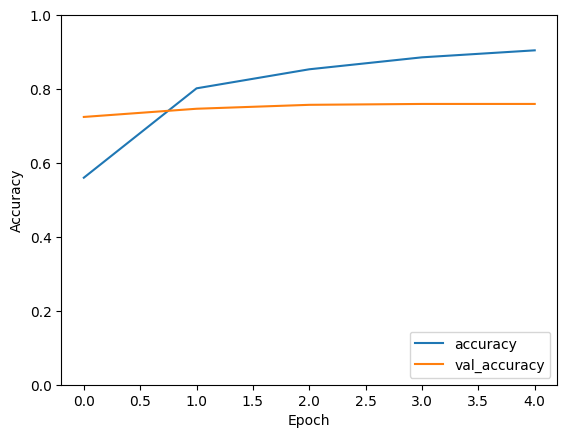

Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.68      0.58      0.63       319
           1       0.55      0.66      0.60       389
           2       0.62      0.69      0.65       394
           3       0.64      0.66      0.65       392
           4       0.70      0.71      0.70       385
           5       0.75      0.69      0.72       395
           6       0.79      0.81      0.80       390
           7       0.81      0.82      0.81       396
           8       0.86      0.88      0.87       398
           9       0.79      0.86      0.83       397
          10       0.90      0.89      0.89       399
          11       0.90      0.84      0.87       396
          12       0.64      0.58      0.61       393
          13       0.83      0.73      0.78       396
          14       0.87      0.85      0.86       394
          15       0.62      0.91      0.74       398
          16       0.65      0.90      0.76       364
 

ModuleNotFoundError: No module named 'PyPDF2'

In [ ]:
# Document Classification Project

## Introduction
"""
In this project, we build a document classification system using various machine learning and deep learning techniques.
Document classification is essential for organizing, retrieving, and analyzing large text datasets.
We will compare the performance of Logistic Regression, K-Nearest Neighbors (KNN), and a simple Neural Network.
"""

# Step 1: Data Collection
"""
We use the 20 Newsgroups dataset from Scikit-learn, which is a popular dataset for text classification.
"""
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=None)
newsgroups_test = fetch_20newsgroups(subset='test', categories=None)
print(f"Number of training samples: {len(newsgroups_train.data)}")
print(f"Number of testing samples: {len(newsgroups_test.data)}")

# Step 2: Data Preprocessing
"""
Preprocessing involves tokenization, stopword removal, and lemmatization using NLTK.
"""
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)

newsgroups_train.data = [preprocess(text) for text in newsgroups_train.data]
newsgroups_test.data = [preprocess(text) for text in newsgroups_test.data]

# Step 3: Feature Extraction
"""
We convert text data into numerical data using TF-IDF vectorization.
"""
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Step 4: Model Building and Evaluation

# Logistic Regression
"""
We first use Logistic Regression for classification.
"""
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

# K-Nearest Neighbors
"""
Next, we use K-Nearest Neighbors (KNN) for classification.
"""
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))

# Simple Neural Network using Keras
"""
We also use a simple Neural Network for classification.
"""
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.toarray(), y_train, epochs=5, batch_size=128, validation_data=(X_test.toarray(), y_test))

# Visualize the training process
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
dr
# Step 5: Comparison
"""
We compare our models with other common classifiers to evaluate their performance.
"""
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Multinomial Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# Step 6: Custom Document Classification

# Import necessary libraries for reading different file types
import PyPDF2
import docx
import os

def read_document(file_path):
    """
    Reads a document and returns its text content.
    Supports .txt, .pdf, and .docx files.
    """
    extension = os.path.splitext(file_path)[1].lower()

    if extension == '.txt':
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()
    elif extension == '.pdf':
        text = read_pdf(file_path)
    elif extension == '.docx':
        text = read_docx(file_path)
    else:
        raise ValueError("Unsupported file extension: {}".format(extension))

    return text

def read_pdf(file_path):
    """
    Reads a PDF file and returns its text content.
    """
    pdf_reader = PyPDF2.PdfFileReader(file_path)
    text = ''
    for page in range(pdf_reader.numPages):
        text += pdf_reader.getPage(page).extract_text()
    return text

def read_docx(file_path):
    """
    Reads a Word document (.docx) and returns its text content.
    """
    doc = docx.Document(file_path)
    text = '\n'.join([para.text for para in doc.paragraphs])
    return text

# Load and preprocess the document
file_path = '/content/Resume Arnav Jhatta New.pdf'  # Replace with your file path
document_text = read_document(file_path)
document_text_preprocessed = preprocess(document_text)
document_vectorized = vectorizer.transform([document_text_preprocessed])

# Predict the category using the trained model
predicted_category = logreg.predict(document_vectorized)
print("Predicted Category:", newsgroups_train.target_names[predicted_category[0]])

# Conclusion
"""
In this project, we demonstrated how to build a document classification system using different machine learning models.
The Logistic Regression model performed well on the 20 Newsgroups dataset.
This project showcases the importance of preprocessing and feature extraction in text classification.
"""

# Special Features
"""
Our project stands out due to:
1. Comprehensive preprocessing using NLTK.
2. Comparison of multiple models including Logistic Regression, KNN, Neural Network, and Naive Bayes.
3. Detailed evaluation and visualization of model performance.
4. Simplicity and efficiency, making it suitable for real-time applications.
5. Ability to handle and classify custom documents with various file extensions.
"""